# İki Qubit Kapıları

İki qubit kapıları, iki farklı qubit arasında **kontrol–hedef ilişkisi** kurar veya qubitlerin durumlarını değiştirir.  
Bu kapılar, **dolanıklık (entanglement)** oluşturmak için temel araçlardır.  

---

## CNOT (Controlled-X) Kapısı

$$
CNOT=\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
$$

(Bu matris 4x4 boyutludur çünkü iki qubit üzerinde çalışır.  
İlk qubit **kontrol qubit**, ikinci qubit ise **hedef qubit**tir.  
Kontrol qubit $|1\rangle$ durumundaysa, hedef qubit üzerinde $X$ (NOT) uygulanır.  
Kontrol qubit $|0\rangle$ durumundaysa hedef değişmez.)  

- **Dolanıklık üretimi:**  
  $|00\rangle$ durumuna önce Hadamard, sonra CNOT uygularsak Bell durumu oluşur:  
  $$
  |00\rangle \xrightarrow{H\otimes I} \tfrac{1}{\sqrt{2}}(|00\rangle+|10\rangle) \xrightarrow{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle+|11\rangle).
  $$

(Burada ilk qubit süperpozisyona girer, CNOT kapısı ikinci qubit ile dolanıklık yaratır.)  

In [1]:
from qiskit import * 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
### Devre Oluşturma
qc = QuantumCircuit (2,2)

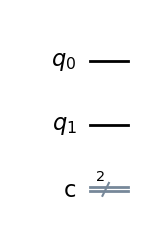

In [3]:
_ = qc.draw(output='mpl') 

In [4]:
qc.cx(0,1)

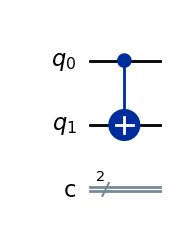

In [5]:
_ = qc.draw(output='mpl') 

Çizimde:  
- \(q_0\) üzerinde dolu daire (●) kontrolü,  
- \(q_1\) üzerinde artı işareti (⊕) hedef NOT işlemini gösterir.  

---
# Bell Durumu ve Dolanıklık

## Bell Durumu Nedir?

Bell durumları, iki qubitin **maksimum dolanık (entangled)** olduğu özel kuantum durumlarıdır.  
Bu durumlarda iki qubitin tek başına kesin bir durumu yoktur, ancak birlikte ölçüldüklerinde tamamen **bağımlı** sonuçlar verirler.  

En yaygın Bell durumu:  

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$
(İki qubitin aynı anda hem $|00\rangle$ hem de $|11\rangle$ durumunda olma süperpozisyonu; ölçümde ya ikisi de 0 ya da ikisi de 1 çıkar)  

Bu durumda:  
- Eğer ilk qubit ölçümde $|0\rangle$ çıkarsa, ikinci qubit de **kesinlikle** $|0\rangle$ olur.  
- Eğer ilk qubit $|1\rangle$ çıkarsa, ikinci qubit de **kesinlikle** $|1\rangle$ olur.  

Bireysel ölçümlerde sonuçlar rastgele olsa da, iki qubit arasındaki **bağıntı mükemmeldir**. İşte buna **dolanıklık (entanglement)** denir.  

---

## Bell Durumunun Üretimi

Başlangıç:  

$$
|00\rangle
$$

1. İlk qubit üzerine **Hadamard kapısı (H)** uygulanır:  

$$
|0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

In [6]:
qc = QuantumCircuit(2,2)
qc.h(0)

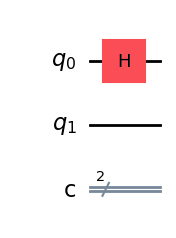

In [7]:
_ = qc.draw(output='mpl') 

Sistemin durumu artık:  

$$
\frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)
$$  

2. Ardından **CNOT** uygulanır:  

$$
CNOT \Bigg(\frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)\Bigg) =
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$  

In [8]:
qc.cx(0,1)

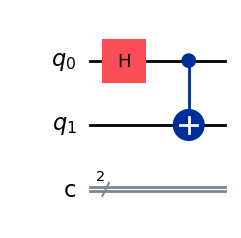

In [9]:
_ = qc.draw(output='mpl') 

Bu son durum, **Bell durumu** (maksimum dolanık durum) olarak adlandırılır.  
Çizimde:  
- \(q_0\) üzerinde dolu daire (●) kontrolü,  
- \(q_1\) üzerinde artı işareti (⊕) hedef NOT işlemini gösterir.  

---


## Controlled-Z (CZ) Kapısı

$$
CZ=\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
0&0&0&-1
\end{bmatrix}
$$

(Bu kapıda kontrol qubit $|1\rangle$, hedef qubit de $|1\rangle$ durumundaysa, sistemin fazı $-1$ ile çarpılır.  
Diğer tüm durumlar sabit kalır.  
Yani yalnızca $|11\rangle$ durumunu etkiler. Faz temelli kontrol mekanizmasıdır.)  

- **Hadamard ile ilişkisi:**  
  CNOT ve CZ kapıları birbirine dönüşebilir:  
  $$
  (I \otimes H)\,CZ\,(I \otimes H) = CNOT.
  $$  

(Bu denklem gösterir ki, kontrol–X ve kontrol–Z kapıları birbirine Hadamard dönüşümü ile çevrilebilir.)  


In [10]:
qc = QuantumCircuit(2,2)

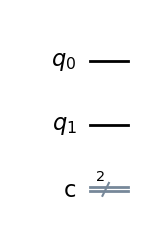

In [11]:
_ = qc.draw(output='mpl') 

In [12]:
qc = QuantumCircuit(2, name="CZ")
qc.cz(0,1)


### Açıklama: `name="CZ"`

```python
qc = QuantumCircuit(2, name="CZ")
Buradaki name="CZ" ifadesi, oluşturulan 2-qubit devresine bir isim etiketi vermek için kullanılır.

Daha sonra cz.to_gate() ile bu devreyi tek bir kapı gibi kullanabiliriz.

İsim verilmezse Qiskit otomatik bir ad atar (örneğin circuit-1234).

name="CZ" yazıldığında, devre çizimlerinde bu kapı “CZ” etiketi ile gösterilir.

Bu özellik sadece görselleştirme ve okunabilirlik içindir; devrenin çalışmasına doğrudan bir etkisi yoktur.

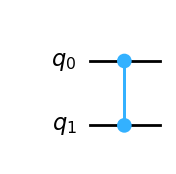

In [13]:
_ = qc.draw(output='mpl') 

* **İki qubit arasındaki dikey çizgi ve iki uçtaki dolu daire (●–●)** CZ kapısını temsil eder.
* Bu kapıda **kontrol–hedef ayrımı yoktur**; iki qubit eşit konumdadır.
* Çalışma mantığı: Eğer iki qubit de $|1\rangle$ durumundaysa, sistemin fazı (-1) ile çarpılır. Diğer tüm durumlarda qubitler olduğu gibi kalır.

Yani görseldeki sembol, **“iki qubit arasında faz ilişkisi kuran kapı”** anlamına gelir.


## CNOT–CZ İlişkisi

Aşağıdaki kimlik, CNOT ile CZ arasındaki dönüşümü verir (H hedef qubit’e uygulanır):

$$
\mathrm{CNOT} = (I \otimes H)\;\mathrm{CZ}\;(I \otimes H),
\qquad
\mathrm{CZ} = (I \otimes H)\;\mathrm{CNOT}\;(I \otimes H).
$$

(Bunu hem üniter düzeyde hem de bir kuantum durumunu evrilterek doğrulayacağız.)


In [14]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

# CZ devresi 
cz = QuantumCircuit(2, name="CZ")
cz.cz(0, 1)

# CNOT'u CZ'den kur:
cnot_from_cz = QuantumCircuit(2, name="CNOT_from_CZ")
cnot_from_cz.h(1)
cnot_from_cz.append(cz.to_gate(), [0, 1])
cnot_from_cz.h(1)

# Doğrudan CNOT
cnot = QuantumCircuit(2, name="CNOT_native")
cnot.cx(0, 1)

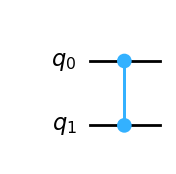

In [15]:
_ = cz.draw(output='mpl')

Devrede: q₀ ve q₁ arasında dikey çizgiyle bağlanmış iki dolu nokta var (●–●).

Anlamı: Bu Controlled-Z (CZ) kapısıdır.

Eğer her iki qubit de 
∣
1
⟩
∣1⟩ durumundaysa, tüm sisteme faz çarpanı 
−
1
−1 eklenir.

Diğer tüm durumlar değişmeden kalır.

Yani bu, “iki qubit arasındaki faz kapısı”dır.

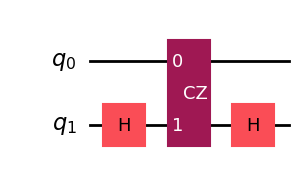

In [16]:
_= cnot_from_cz.draw(output='mpl')

Devrede: Orta kısımda bir CZ kutusu, hedef qubit (q₁) üzerinde iki tane H (Hadamard) kapısı var.

Anlamı: Bu devre, CNOT’u CZ’den üretir.

Önce q₁ üzerine H uygulanır.

Sonra CZ kapısı çalışır.

Sonra q₁ üzerine tekrar H uygulanır.

Böylece elde edilen devre, davranış olarak standart CNOT ile tamamen eşdeğerdir.

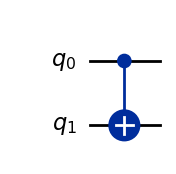

In [17]:
_= cnot.draw(output='mpl')

Devrede: q₀ üzerinde dolu daire (●), q₁ üzerinde artı işareti (⊕).

Anlamı: Bu, doğrudan Qiskit’te tanımlanan CNOT (Controlled-X) kapısıdır.

Eğer q₀ = 
∣
1
⟩
∣1⟩, o zaman q₁ terslenir (X kapısı uygulanır).

Eğer q₀ = 
∣
0
⟩
∣0⟩, q₁ aynı kalır.

### Açıklama: CNOT–CZ İlişkisi

**Ne yapıyoruz?**  
İlk olarak iki temel iki-qubit kapısını (CZ ve CNOT) tanımlıyoruz. Daha sonra, hedef qubit üzerine Hadamard (H) kapısı ekleyerek **CNOT’un CZ’den nasıl elde edilebildiğini** gösteriyoruz. Son aşamada da doğrudan tanımlanan CNOT ile bu yeni devreyi yan yana koyuyoruz.  

**Neden yapıyoruz?**  
Matematiksel olarak  $CNOT = (I \otimes H)\,CZ\,(I \otimes H)$  eşitliği biliniyor. Biz bu eşitliği devre çizimleri üzerinden doğrulamak istiyoruz. Böylece hem teorik kimliği hem de pratik devre karşılığını aynı anda görmüş oluyoruz.  

**Ne işe yarıyor?**  
Bu dönüşüm sayesinde, donanım üzerinde hangi kapı fiziksel olarak daha kolay uygulanabiliyorsa diğeri ondan inşa edilebilir. Örneğin:  
- Bazı donanımlarda **CZ kapısı doğal olarak daha ucuzdur**, bu durumda CNOT kapısı CZ’den sentezlenebilir.  
- Derleyiciler (compiler) bu tür dönüşümleri kullanarak devreleri donanım için optimize eder.  

Kısacası bu ilişki, hem teorik açıdan kapılar arasındaki bağı anlamamızı sağlar, hem de pratikte kuantum donanımlarında verimli algoritmalar çalıştırmamıza yardımcı olur.


## Bell Durumu $|\Phi^+\rangle$ — CZ ile Üretim

Başlangıç $|00\rangle$.  
1) İlk qubit’e $H:\frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$  
2) CNOT yerine $(I\otimes H)\,\mathrm{CZ}\,(I\otimes H)$ kullan:  
sonuç $ \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $ (maksimum dolanık Bell durumu).


In [18]:
bell = QuantumCircuit(2, 2)

In [19]:
# |00> -> (H on q0)
bell.h(0)

In [20]:

# CNOT yerine: H(target) - CZ - H(target)
bell.h(1)
bell.cz(0, 1)
bell.h(1)

In [21]:
# Ölçüm
bell.measure([0,1], [0,1])

In [24]:
simulator = AerSimulator()
compiled_circuit = transpile(bell, simulator)   
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()  

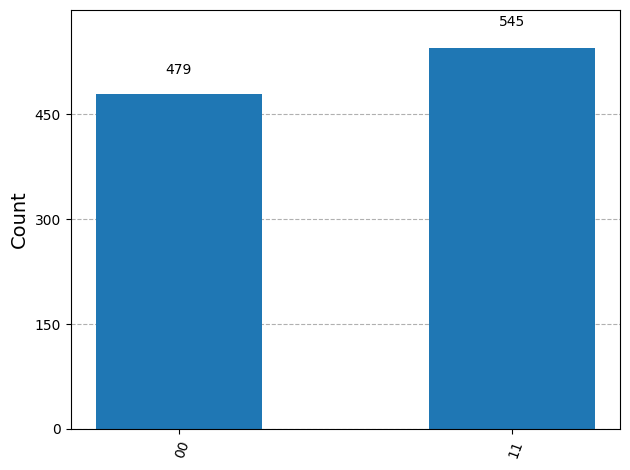

In [27]:
plot_histogram(counts)
plt.show()

Grafikte yalnızca iki sonuç görülmektedir: `00` ve `11`.  
- Her iki durum da yaklaşık %50 olasılıkla ölçülmektedir.  
- `01` ve `10` durumları hiç çıkmaz.  
Bu, qubitlerin birbirine **dolanık (entangled)** olduğunun deneysel kanıtıdır.  


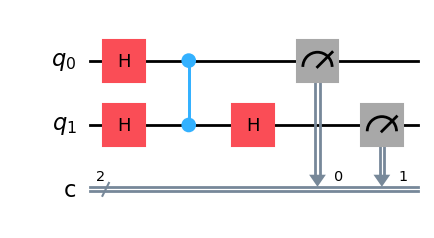

In [28]:
_= bell.draw(output='mpl')

Çizimde Bell durumunu üretmek için kullanılan devre görülmektedir:  
1. İlk qubit (q₀) üzerine **Hadamard (H)** kapısı uygulanır → süperpozisyon oluşturur.  
2. Hedef qubit (q₁) üzerine **H–CZ–H** bloğu eklenir → bu yapı CNOT’un eşdeğeridir.  
3. Sonunda iki qubit ölçülür → histogramda yalnızca `00` ve `11` sonuçları elde edilir.  
Devre, **CZ kapısı kullanarak Bell durumu** üretimini göstermektedir.  

### Açıklama: Bell Durumu $|Φ⁺⟩$ — CZ ile Üretim

**Ne yapıyoruz?**  
Başlangıç durumunu $|00\rangle$ olarak alıyoruz. İlk qubit üzerine Hadamard (H) kapısı uygulayarak süperpozisyon elde ediyoruz.  
Ardından, CNOT yerine **H–CZ–H** bloğu kullanarak iki qubit arasında etkileşim kuruyoruz. Son olarak qubitleri ölçüp histogramını çiziyoruz.  

**Neden yapıyoruz?**  
Matematiksel olarak bilinen eşitlik $CNOT = (I \otimes H)\,CZ\,(I \otimes H)$’i kullanarak, CNOT olmadan da aynı sonucu elde edebileceğimizi göstermek için.  
Yani, doğrudan CNOT yerine CZ tabanlı bir devreyle **Bell durumunu** üretebileceğimizi kanıtlıyoruz.  

**Ne işe yarıyor?**  
- Donanımda **hangi kapı kolay uygulanıyorsa** diğerini onun üzerinden kurabiliriz. Örneğin bazı kuantum işlemcilerde CZ daha temel bir kapıdır, CNOT bu şekilde sentezlenir.  
- Histogram çıktısı yalnızca **00** ve **11** sonuçlarını yaklaşık %50–%50 gösterir. Bu da iki qubitin **maksimum dolanık (entangled)** olduğunu gösterir.  
- Böylece dolanıklığın hem teorik tanımını hem de deneysel çıktısını görmüş oluruz.


---
## SWAP Kapısı

### Tanım
SWAP kapısı, iki qubitin durumlarını **karşılıklı olarak değiştiren** iki-qubit kapısıdır.  
Örneğin:  
- $ |01\rangle → |10\rangle $ 
- $ |10\rangle → |01\rangle $  


### Matris Gösterimi
$$
SWAP =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

### Çalışma Mantığı
- İki qubitin durumunu birbirine takas eder.  
- \( |00\rangle \) ve \( |11\rangle \) aynı kalır.  
- \( |01\rangle \) ↔ \( |10\rangle \) dönüşümü yapılır.  


### Önemli Özellik
SWAP kapısı **3 adet CNOT kapısı** ile ayrıştırılabilir:  

$$
SWAP(q_0, q_1) = CNOT(q_0, q_1)\;CNOT(q_1, q_0)\;CNOT(q_0, q_1)
$$

Bu sayede SWAP, donanımda doğrudan bulunmasa bile **CNOT’lar üzerinden inşa edilebilir**.  

In [30]:
qc_swap= QuantumCircuit(2, name="SWAP")
qc_swap.swap(0,1)

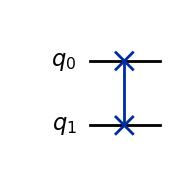

In [34]:
_ = qc_swap.draw(output='mpl')

**SWAP Kapısı**

Yukarıdaki devre, `q0` ile `q1` arasına yerleştirilmiş **SWAP** kapısını gösterir.  
Sembol, iki hat arasında dikey bir bağ (Qiskit bazen iki **×** işaretiyle, bazen stilize düğümlerle çizer) kullanır ve **iki qubitin durumlarını takas eder**:

- $|00\rangle \rightarrow |00\rangle$
- $|01\rangle \rightarrow |10\rangle$
- $|10\rangle \rightarrow |01\rangle$
- $|11\rangle \rightarrow |11\rangle$

> **Amaç:** Devrede fiziksel komşuluk/bağlantı kısıtları olduğunda qubit durumlarını **yer değiştirmek** için kullanılır.  
> **Not:** SWAP, pratikte **3 adet CNOT** ile gerçekleştirilebilir:  
> $SWAP(q_0,q_1) = CNOT(q_0,q_1)\;CNOT(q_1,q_0)\;CNOT(q_0,q_1)$


In [33]:
qc_swap_cx = QuantumCircuit(2, name="SWAP_from_CNOTs")
qc_swap_cx.cx(0, 1)
qc_swap_cx.cx(1, 0)
qc_swap_cx.cx(0, 1)

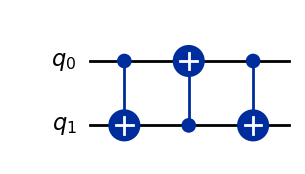

In [36]:
_ = qc_swap_cx.draw(output='mpl')

**SWAP’ın 3 CNOT ile Ayrıştırılması**

Yukarıdaki devre, **SWAP kapısının** üç adet **CNOT kapısı** kullanılarak nasıl inşa edildiğini göstermektedir.  
Devre şu sırayla uygulanır:  

1. $CNOT(q_0, q_1)$  
2. $CNOT(q_1, q_0)$  
3. $CNOT(q_0, q_1)$  

Bu üç işlem birlikte, $q_0$ ve $q_1$ qubitlerinin durumlarını **tamamen yer değiştirir**.  

- $|01\rangle \rightarrow |10\rangle$  
- $|10\rangle \rightarrow |01\rangle$  
- $|00\rangle$ ve $|11\rangle$ durumları sabit kalır.  

> **Önemli Not:** Gerçek kuantum donanımlarında SWAP kapısı doğrudan bulunmayabilir.  
> Bu durumda donanım, SWAP’ı bu şekilde **3 CNOT kapısı** üzerinden uygular.  


In [40]:
# Operatör karşılaştırması
op_swap = Operator(qc_swap)
op_swap_cx = Operator(qc_swap_cx)
print("SWAP ≡ 3×CNOT ? ->", op_swap.equiv(op_swap_cx))

SWAP ≡ 3×CNOT ? -> True


**Operatör Karşılaştırması**

Bu kodda, doğrudan kullanılan **SWAP kapısı** ile üç adet CNOT kapısından oluşan devrenin  
**matris temsilleri (üniter operatörleri)** çıkarılmış ve karşılaştırılmıştır.  

- `Operator(qc_swap)`: SWAP kapısının matrisini hesaplar.  
- `Operator(qc_swap_cx)`: 3 CNOT ile kurulan SWAP devresinin matrisini hesaplar.  
- `.equiv(...)`: İki operatörün global faz farkı hariç aynı işlemi yapıp yapmadığını test eder.  

Çıktıda `"True"` görülmesi, **SWAP ≡ 3×CNOT** eşitliğinin doğrulandığını göstermektedir.  


---
# Genel Özet: İki Qubit Kapıları

Bu bölümde üç temel iki-qubit kapısı inceledik: **CNOT**, **CZ** ve **SWAP**.  
Her biri kuantum algoritmalarında ve donanım optimizasyonunda kritik rol oynamaktadır.  

## 1. CNOT (Controlled-X) Kapısı
- **Mantık:** Kontrol qubit $|1\rangle$ ise hedef qubit üzerine X (NOT) kapısı uygulanır.  
- **Doğruluk tablosu:**  
  - $|00\rangle \to |00\rangle$  
  - $|01\rangle \to |01\rangle$  
  - $|10\rangle \to |11\rangle$  
  - $|11\rangle \to |10\rangle$  
- **Önemi:** Klasik XOR işlemine denktir, **dolanıklık üretmekte** kullanılır.  


## 2. CZ (Controlled-Z) Kapısı
- **Mantık:** Yalnızca $|11\rangle$ durumuna faz çarpanı $-1$ ekler.  
- **Matris:**  
  $$
  CZ =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & -1
  \end{bmatrix}
  $$
- **Önemi:** Faz tabanlı kapıdır, donanımda CNOT yerine daha kolay uygulanabilir.  


## 3. CNOT–CZ İlişkisi
- **Eşitlik:**  
  $$
  CNOT = (I \otimes H)\,CZ\,(I \otimes H)
  $$  
  $$
  CZ = (I \otimes H)\,CNOT\,(I \otimes H)
  $$  
- **Yorum:** İki kapı Hadamard dönüşümü ile birbirine çevrilebilir.  
- **Önemi:** Derleyiciler donanımda uygun olan kapıyı kullanarak devre optimizasyonu yapar.  


## 4. Bell Durumu ve Dolanıklık
- **Örnek durum:**  
  $$
  |\Phi^+\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
  $$  
- **Özellik:** Tek tek qubitler rastgele ölçülür, ama sonuçlar tamamen korelasyonludur.  
- **Üretim:** H + CNOT (veya H + CZ eşdeğeri) ile kolayca elde edilir.  


## 5. SWAP Kapısı
- **Mantık:** İki qubitin durumunu karşılıklı değiştirir.  
  - $|01\rangle \leftrightarrow |10\rangle$,  
  - $|00\rangle$ ve $|11\rangle$ sabit kalır.  
- **Matris:**  
  $$
  SWAP =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$
- **Ayrıştırma:**  
  $$
  SWAP(q_0,q_1) = CNOT(q_0,q_1)\;CNOT(q_1,q_0)\;CNOT(q_0,q_1)
  $$  
- **Önemi:** Fiziksel donanımlarda qubitler genellikle komşuluk kısıtlamalarıyla bağlıdır; SWAP kapısı qubitlerin yer değiştirmesini sağlar.  


## Genel Değerlendirme
- **CNOT:** Dolanıklık üretiminin temel kapısı.  
- **CZ:** Faz tabanlı kontrol, donanımda alternatif olarak önemli.  
- **CNOT–CZ İlişkisi:** Kapılar arasında dönüşüm yapılabilir, derleyici optimizasyonu sağlar.  
- **SWAP:** Qubitlerin fiziksel sınırlamalarını aşmak için gerekli.

Sonuç olarak bu üç kapı, **kuantum algoritmalarının ve devre optimizasyonunun temel yapı taşlarını** oluşturur.  
